In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
df_spectral = pd.read_csv(r"D:\wenqu\PLSR\aviris_output.csv")
df_spectral

,file_name,band_16,band_17,band_18,band_19,band_20,band_21,band_22,band_23,band_24,...,band_395,band_396,band_397,band_398,band_399,band_400,band_401,band_402,band_403,band_404
0,site1b_10_21.tif,0.030402,0.028525,0.030111,0.032009,0.031008,0.031431,0.032624,0.031763,0.032500,...,0.053857,0.054110,0.051653,0.050437,0.053759,0.049272,0.048609,0.051505,0.049786,0.044607
1,site1b_10_24.tif,0.030805,0.029308,0.031319,0.032004,0.031469,0.031263,0.032163,0.031412,0.031647,...,0.048453,0.049427,0.049070,0.050183,0.050089,0.047785,0.044082,0.047564,0.047602,0.042990
2,site1b_10_25.tif,0.029818,0.029943,0.031615,0.032896,0.032790,0.032231,0.032862,0.032542,0.032359,...,0.054360,0.055096,0.055735,0.054570,0.053953,0.053713,0.050551,0.053728,0.048996,0.047515
3,site1b_10_26.tif,0.028953,0.028596,0.029417,0.030974,0.030096,0.030064,0.030843,0.030819,0.031217,...,0.053602,0.054162,0.053460,0.051959,0.052348,0.049764,0.049783,0.049485,0.049124,0.045897
4,site1b_10_27.tif,0.030194,0.029072,0.031152,0.031962,0.033075,0.031606,0.032960,0.031858,0.031784,...,0.050521,0.052109,0.048870,0.050354,0.049694,0.047207,0.044002,0.047390,0.046256,0.044414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,site6_9_46.tif,0.041151,0.043303,0.045553,0.043965,0.044650,0.045819,0.047326,0.048459,0.048458,...,0.083137,0.081265,0.081099,0.083178,0.080489,0.081618,0.079605,0.079868,0.076788,0.078303
3572,site6_9_47.tif,0.037633,0.038123,0.040890,0.040855,0.042653,0.043819,0.044825,0.046315,0.045017,...,0.083531,0.079225,0.082199,0.080039,0.083467,0.079242,0.082244,0.079118,0.078652,0.075917
3573,site6_9_48.tif,0.037282,0.037747,0.040314,0.040320,0.042858,0.043147,0.044671,0.044944,0.044449,...,0.075531,0.075147,0.073898,0.074897,0.074406,0.072694,0.076727,0.075635,0.071296,0.071726
3574,site6_9_49.tif,0.035442,0.035597,0.037806,0.039369,0.039687,0.040756,0.041030,0.042670,0.042498,...,0.063318,0.066033,0.064493,0.061225,0.065052,0.062663,0.063612,0.060363,0.058004,0.060773


In [3]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [4]:
len(band_name)

319

In [5]:
x_spectra = df_spectral[band_name]
x = x_spectra.to_numpy()

In [6]:
x.shape

(3576, 319)

In [7]:
la_trait_pdf = []
# keep_file = []
for file_name in df_spectral['file_name']:
    print(file_name)
    file_name = 'D:/wenqu/PLSR/trait_map/'  + file_name
    x_data = gdal.Open(file_name).ReadAsArray()
    x_data = x_data[x_data>0.05].flatten()
    
    # Calculate the PDF using KDE
    kde = gaussian_kde(x_data)
    x = np.linspace(np.min(x_data), np.max(x_data), 1000)
    pdf = kde(x)

    # Calculate the ymax and std
    ymax = np.max(pdf)
    
#     # Generate new data from the PDF using KDE
    new_data = kde.resample(1000)[0]

    # Calculate the std of the new data
    std_new = np.std(new_data)
    la_trait_pdf.append(std_new)

site1b_10_21.tif
site1b_10_24.tif
site1b_10_25.tif
site1b_10_26.tif
site1b_10_27.tif
site1b_10_28.tif
site1b_10_29.tif
site1b_10_30.tif
site1b_10_31.tif
site1b_10_34.tif
site1b_10_35.tif
site1b_10_36.tif
site1b_10_37.tif
site1b_11_21.tif
site1b_11_26.tif
site1b_11_27.tif
site1b_11_28.tif
site1b_11_29.tif
site1b_11_30.tif
site1b_11_31.tif
site1b_11_32.tif
site1b_11_34.tif
site1b_11_35.tif
site1b_11_36.tif
site1b_11_37.tif
site1b_11_38.tif
site1b_11_39.tif
site1b_12_21.tif
site1b_12_22.tif
site1b_12_23.tif
site1b_12_28.tif
site1b_12_29.tif
site1b_12_30.tif
site1b_12_31.tif
site1b_12_32.tif
site1b_12_33.tif
site1b_12_34.tif
site1b_12_35.tif
site1b_12_36.tif
site1b_12_37.tif
site1b_12_38.tif
site1b_12_39.tif
site1b_12_40.tif
site1b_12_51.tif
site1b_13_20.tif
site1b_13_21.tif
site1b_13_22.tif
site1b_13_23.tif
site1b_13_24.tif
site1b_13_25.tif
site1b_13_26.tif
site1b_13_30.tif
site1b_13_32.tif
site1b_13_33.tif
site1b_13_34.tif
site1b_13_35.tif
site1b_13_36.tif
site1b_13_37.tif
site1b_13_38.t

site1b_25_47.tif
site1b_25_48.tif
site1b_25_49.tif
site1b_25_53.tif
site1b_25_54.tif
site1b_25_55.tif
site1b_25_56.tif
site1b_25_57.tif
site1b_25_58.tif
site1b_25_59.tif
site1b_25_60.tif
site1b_25_61.tif
site1b_25_62.tif
site1b_25_63.tif
site1b_25_64.tif
site1b_25_65.tif
site1b_25_73.tif
site1b_25_74.tif
site1b_25_75.tif
site1b_25_76.tif
site1b_25_77.tif
site1b_25_78.tif
site1b_26_17.tif
site1b_26_18.tif
site1b_26_22.tif
site1b_26_23.tif
site1b_26_24.tif
site1b_26_25.tif
site1b_26_26.tif
site1b_26_27.tif
site1b_26_28.tif
site1b_26_29.tif
site1b_26_31.tif
site1b_26_32.tif
site1b_26_33.tif
site1b_26_34.tif
site1b_26_38.tif
site1b_26_39.tif
site1b_26_40.tif
site1b_26_41.tif
site1b_26_42.tif
site1b_26_43.tif
site1b_26_44.tif
site1b_26_45.tif
site1b_26_46.tif
site1b_26_47.tif
site1b_26_48.tif
site1b_26_49.tif
site1b_26_50.tif
site1b_26_56.tif
site1b_26_57.tif
site1b_26_58.tif
site1b_26_59.tif
site1b_26_60.tif
site1b_26_61.tif
site1b_26_62.tif
site1b_26_63.tif
site1b_26_64.tif
site1b_26_65.t

site1b_34_87.tif
site1b_34_88.tif
site1b_34_89.tif
site1b_34_90.tif
site1b_34_91.tif
site1b_34_92.tif
site1b_34_93.tif
site1b_35_16.tif
site1b_35_17.tif
site1b_35_18.tif
site1b_35_19.tif
site1b_35_23.tif
site1b_35_24.tif
site1b_35_25.tif
site1b_35_26.tif
site1b_35_27.tif
site1b_35_28.tif
site1b_35_29.tif
site1b_35_30.tif
site1b_35_31.tif
site1b_35_32.tif
site1b_35_33.tif
site1b_35_34.tif
site1b_35_35.tif
site1b_35_40.tif
site1b_35_41.tif
site1b_35_42.tif
site1b_35_43.tif
site1b_35_44.tif
site1b_35_45.tif
site1b_35_46.tif
site1b_35_47.tif
site1b_35_48.tif
site1b_35_49.tif
site1b_35_50.tif
site1b_35_51.tif
site1b_35_52.tif
site1b_35_73.tif
site1b_35_74.tif
site1b_35_75.tif
site1b_35_76.tif
site1b_35_77.tif
site1b_35_78.tif
site1b_35_79.tif
site1b_35_80.tif
site1b_35_81.tif
site1b_35_82.tif
site1b_35_83.tif
site1b_35_85.tif
site1b_35_86.tif
site1b_35_87.tif
site1b_35_88.tif
site1b_35_89.tif
site1b_35_90.tif
site1b_35_91.tif
site1b_35_92.tif
site1b_35_93.tif
site1b_35_94.tif
site1b_35_95.t

site1b_42_95.tif
site1b_42_96.tif
site1b_42_97.tif
site1b_42_98.tif
site1b_42_99.tif
site1b_43_100.tif
site1b_43_22.tif
site1b_43_23.tif
site1b_43_24.tif
site1b_43_25.tif
site1b_43_26.tif
site1b_43_27.tif
site1b_43_28.tif
site1b_43_29.tif
site1b_43_30.tif
site1b_43_31.tif
site1b_43_32.tif
site1b_43_33.tif
site1b_43_34.tif
site1b_43_39.tif
site1b_43_40.tif
site1b_43_41.tif
site1b_43_42.tif
site1b_43_43.tif
site1b_43_44.tif
site1b_43_45.tif
site1b_43_46.tif
site1b_43_47.tif
site1b_43_48.tif
site1b_43_49.tif
site1b_43_50.tif
site1b_43_51.tif
site1b_43_64.tif
site1b_43_66.tif
site1b_43_67.tif
site1b_43_68.tif
site1b_43_71.tif
site1b_43_72.tif
site1b_43_73.tif
site1b_43_74.tif
site1b_43_75.tif
site1b_43_76.tif
site1b_43_77.tif
site1b_43_78.tif
site1b_43_79.tif
site1b_43_80.tif
site1b_43_83.tif
site1b_43_84.tif
site1b_43_85.tif
site1b_43_86.tif
site1b_43_87.tif
site1b_43_88.tif
site1b_43_89.tif
site1b_43_90.tif
site1b_43_91.tif
site1b_43_92.tif
site1b_43_93.tif
site1b_43_95.tif
site1b_43_96.

site1b_51_89.tif
site1b_51_93.tif
site1b_51_94.tif
site1b_51_95.tif
site1b_51_96.tif
site1b_51_97.tif
site1b_51_98.tif
site1b_51_99.tif
site1b_52_100.tif
site1b_52_101.tif
site1b_52_102.tif
site1b_52_103.tif
site1b_52_109.tif
site1b_52_110.tif
site1b_52_40.tif
site1b_52_41.tif
site1b_52_42.tif
site1b_52_43.tif
site1b_52_44.tif
site1b_52_45.tif
site1b_52_46.tif
site1b_52_47.tif
site1b_52_48.tif
site1b_52_49.tif
site1b_52_50.tif
site1b_52_51.tif
site1b_52_59.tif
site1b_52_60.tif
site1b_52_61.tif
site1b_52_62.tif
site1b_52_63.tif
site1b_52_64.tif
site1b_52_65.tif
site1b_52_66.tif
site1b_52_67.tif
site1b_52_68.tif
site1b_52_71.tif
site1b_52_72.tif
site1b_52_73.tif
site1b_52_74.tif
site1b_52_75.tif
site1b_52_76.tif
site1b_52_77.tif
site1b_52_78.tif
site1b_52_79.tif
site1b_52_80.tif
site1b_52_83.tif
site1b_52_84.tif
site1b_52_85.tif
site1b_52_86.tif
site1b_52_87.tif
site1b_52_88.tif
site1b_52_89.tif
site1b_52_90.tif
site1b_52_95.tif
site1b_52_96.tif
site1b_52_97.tif
site1b_52_98.tif
site1b_5

site1b_65_81.tif
site1b_65_82.tif
site1b_65_83.tif
site1b_65_87.tif
site1b_65_88.tif
site1b_65_89.tif
site1b_65_90.tif
site1b_65_91.tif
site1b_65_93.tif
site1b_65_94.tif
site1b_65_95.tif
site1b_66_76.tif
site1b_66_77.tif
site1b_66_78.tif
site1b_66_79.tif
site1b_66_80.tif
site1b_66_81.tif
site1b_66_82.tif
site1b_66_83.tif
site1b_66_84.tif
site1b_66_89.tif
site1b_66_90.tif
site1b_66_91.tif
site1b_66_92.tif
site1b_66_93.tif
site1b_66_94.tif
site1b_66_95.tif
site1b_66_96.tif
site1b_67_78.tif
site1b_67_79.tif
site1b_67_80.tif
site1b_67_81.tif
site1b_67_82.tif
site1b_67_83.tif
site1b_67_84.tif
site1b_67_85.tif
site1b_67_86.tif
site1b_67_90.tif
site1b_67_91.tif
site1b_67_92.tif
site1b_67_93.tif
site1b_67_94.tif
site1b_67_95.tif
site1b_67_96.tif
site1b_67_97.tif
site1b_67_98.tif
site1b_68_79.tif
site1b_68_80.tif
site1b_68_81.tif
site1b_68_82.tif
site1b_68_83.tif
site1b_68_84.tif
site1b_68_85.tif
site1b_68_86.tif
site1b_68_87.tif
site1b_68_91.tif
site1b_68_92.tif
site1b_68_93.tif
site1b_68_94.t

site2a_17_29.tif
site2a_17_30.tif
site2a_17_31.tif
site2a_17_32.tif
site2a_17_8.tif
site2a_17_9.tif
site2a_18_10.tif
site2a_18_11.tif
site2a_18_12.tif
site2a_18_13.tif
site2a_18_14.tif
site2a_18_15.tif
site2a_18_16.tif
site2a_18_17.tif
site2a_18_18.tif
site2a_18_19.tif
site2a_18_20.tif
site2a_18_21.tif
site2a_18_22.tif
site2a_18_23.tif
site2a_18_24.tif
site2a_18_25.tif
site2a_18_26.tif
site2a_18_27.tif
site2a_18_28.tif
site2a_18_30.tif
site2a_18_31.tif
site2a_18_32.tif
site2a_18_9.tif
site2a_19_10.tif
site2a_19_11.tif
site2a_19_12.tif
site2a_19_13.tif
site2a_19_14.tif
site2a_19_15.tif
site2a_19_16.tif
site2a_19_17.tif
site2a_19_18.tif
site2a_19_19.tif
site2a_19_20.tif
site2a_19_21.tif
site2a_19_22.tif
site2a_19_23.tif
site2a_19_24.tif
site2a_19_25.tif
site2a_19_26.tif
site2a_19_27.tif
site2a_19_28.tif
site2a_19_30.tif
site2a_19_31.tif
site2a_19_8.tif
site2a_19_9.tif
site2a_20_10.tif
site2a_20_11.tif
site2a_20_12.tif
site2a_20_13.tif
site2a_20_14.tif
site2a_20_15.tif
site2a_20_16.tif
si

site6_35_24.tif
site6_35_25.tif
site6_35_26.tif
site6_35_27.tif
site6_36_23.tif
site6_36_24.tif
site6_36_25.tif
site6_36_26.tif
site6_36_27.tif
site6_37_22.tif
site6_37_23.tif
site6_37_24.tif
site6_37_25.tif
site6_37_26.tif
site6_38_21.tif
site6_38_22.tif
site6_38_23.tif
site6_38_24.tif
site6_38_25.tif
site6_39_20.tif
site6_39_21.tif
site6_39_22.tif
site6_39_23.tif
site6_39_24.tif
site6_3_52.tif
site6_3_53.tif
site6_3_54.tif
site6_3_55.tif
site6_40_19.tif
site6_40_20.tif
site6_40_21.tif
site6_40_22.tif
site6_40_23.tif
site6_40_24.tif
site6_41_18.tif
site6_41_19.tif
site6_41_20.tif
site6_41_21.tif
site6_41_22.tif
site6_41_23.tif
site6_41_24.tif
site6_41_25.tif
site6_42_18.tif
site6_42_19.tif
site6_42_20.tif
site6_42_21.tif
site6_42_22.tif
site6_42_23.tif
site6_42_24.tif
site6_42_25.tif
site6_43_16.tif
site6_43_17.tif
site6_43_18.tif
site6_43_19.tif
site6_43_20.tif
site6_43_21.tif
site6_43_22.tif
site6_43_23.tif
site6_43_24.tif
site6_44_16.tif
site6_44_17.tif
site6_44_18.tif
site6_44_19.

In [8]:
la_trait_pdf

[0.07415133780815601,
 0.04477297882192949,
 0.046228031702690985,
 0.051244554652014516,
 0.0482716078690005,
 0.07751750627109409,
 0.07785744314678139,
 0.06241059579488135,
 0.0467197899170312,
 0.049687251604508424,
 0.047476262169516864,
 0.04380970691162929,
 0.04529166727728276,
 0.06822890769465613,
 0.059203438568014584,
 0.06414491923332058,
 0.07745343143884471,
 0.06644993925807459,
 0.05699681661642169,
 0.04252968127847427,
 0.04795560032026207,
 0.035136429239960174,
 0.03547629337010231,
 0.045363333311693094,
 0.058504799121651505,
 0.04838774181973339,
 0.054024006720494754,
 0.05630309103522578,
 0.04438875991384648,
 0.04964330886034029,
 0.0686173839582894,
 0.04006878822849364,
 0.05457857820458844,
 0.05462073449070387,
 0.04718540760500169,
 0.04239080528905288,
 0.03459606730757519,
 0.03194675108416673,
 0.029467401368245705,
 0.040119294594805434,
 0.04907873684071087,
 0.04315159932176538,
 0.052372960684069214,
 0.05167444218454925,
 0.03637118909240287,
 

In [9]:
y = la_trait_pdf
y = np.array(y)


In [10]:
x_spectra = df_spectral[band_name]
x = x_spectra.to_numpy()

In [11]:
y.shape

(3576,)

In [12]:
print(y.dtype)

float64


In [13]:
y.shape, x.shape

((3576,), (3576, 319))

In [14]:
band_name = np.array(band_name)

In [15]:
# Python
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
    # plt.imshow(mse, interpolation=None)
    # plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [16]:
def simple_pls_cv(X, y, n_comp):
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
        # Plot regression 
 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_cv, y, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        
        plt.show()

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


3% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


13% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


23% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


33% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


43% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


53% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


63% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


73% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


83% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


93% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  279
Optimised MSEP  8.957156556592943e-05

R2 calib: 0.285
R2 CV: 0.226
MSE calib: 0.000
MSE CV: 0.000


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


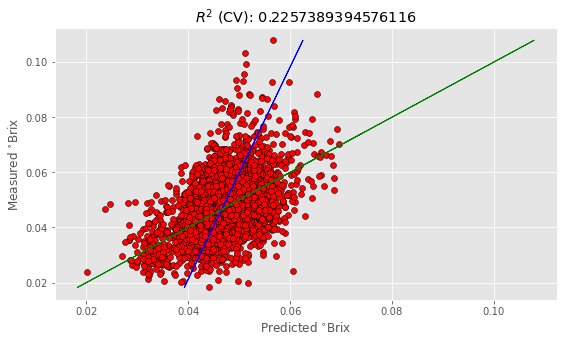

In [17]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x, y, 30)
simple_pls_cv(opt_Xc, y, ncomp)

In [21]:
print('Highest allowed',y.mean() + 3*y.std())
print('Lowest allowed',y.mean() - 3*y.std())

Highest allowed 0.34125844126230315
Lowest allowed 0.10493196595953208


In [24]:
import numpy as np
print(np.where(y >0.34125844126230315))

(array([ 232,  304,  380,  382,  506,  507,  710,  822,  934,  986, 1076,
       1124, 1191, 1192, 1260, 1429, 1444, 1485, 1626, 1685, 1831, 1840,
       1938, 1986, 2081, 2163, 2200, 2240, 2244, 2379, 2431, 2448, 2626,
       2627, 2651, 2768, 2834, 2835, 3299, 3307, 3334, 3339, 3345, 3395,
       3423, 3498, 3499, 3546, 3552], dtype=int64),)


In [25]:
print(np.where(y < 0.10493196595953208))

(array([], dtype=int64),)


In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()